In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_img_data = np.load('data.npy')
label_data = np.load('label.npy')

In [3]:
normalized_img_data = raw_img_data / 255.0
normalized_imshow_array = normalized_img_data.reshape(14780, 28, 28)

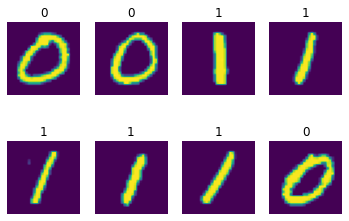

In [4]:
index = np.random.randint(0, len(normalized_imshow_array), size=8)
i = 0

fig, axs = plt.subplots(2, 4)
for r in range(2):
    for c in range(4):
        axs[r, c].imshow(normalized_imshow_array[index[i]].reshape(28, 28))
        axs[r, c].set_title(str(label_data[index[i]]))
        axs[r, c].axis('off')
        i+=1

In [21]:
relabeled_data = np.where(label_data == 1, -1, label_data)
relabeled_data = np.where(relabeled_data == 0, 1, relabeled_data)

In [22]:
(unique, counts) = np.unique(relabeled_data, return_counts=True)
frequencies_relabeled = np.asarray((unique, counts)).T

(unique, counts) = np.unique(label_data, return_counts=True)
frequencies_original = np.asarray((unique, counts)).T

print("original frequency counts")
print(frequencies_original)
print("after relabeling (1 --> -1, 0 --> 1)")
print(frequencies_relabeled)

original frequency counts
[[   0 6903]
 [   1 7877]]
after relabeling (1 --> -1, 0 --> 1)
[[  -1 7877]
 [   1 6903]]


In [23]:
train_num_samples = int(0.8 * len(relabeled_data))
test_num_samples = len(relabeled_data) - train_num_samples
print("80-20 Test-Train Split = " + str(train_num_samples) + "-" + str(test_num_samples))

train_indices = np.random.randint(0, len(relabeled_data), size=train_num_samples)
test_indices = np.random.randint(0, len(relabeled_data), size=test_num_samples)

80-20 Test-Train Split = 11824-2956


In [24]:
X_train, X_test = normalized_img_data[train_indices], normalized_img_data[test_indices]
Y_train, Y_test = relabeled_data[train_indices], relabeled_data[test_indices]

print("Size of Train vs Test = " + str(len(X_train)) + "-" + str(len(X_test)))

Size of Train vs Test = 11824-2956


In [25]:
mu, sigma = 0, 1
d = 28*28
beta_0 = np.random.normal(mu, sigma, 1)[0]
beta_1 = np.random.normal(mu, sigma, d)

In [26]:
def loss_function(beta_0, beta_1, X, Y):
    """
    :param beta_0, beta_1: Logistic Regression coefficients
    :return: Loss over Training set (X and Y are globals)
    """
    loss_function_sum = 0.0
    m = len(X)
    for i in range(m):
        loss_function_sum += np.log(1 + np.exp(-Y[i] * (beta_0 + np.dot(beta_1,X[i, :]))))
    loss_function_result = loss_function_sum / m
    return loss_function_result

In [27]:
def compute_gradients(beta_0, beta_1, X, Y):
    """
    :return: Gradient of beta_0, Gradient of beta_1
    """
    d_beta_0_sum = 0.0
    d_beta_1_sum = 0.0
    m = len(X)
    for i in range(m):
        exponent_term = np.exp(-Y[i] * (beta_0 + np.dot(beta_1.T,X[i, :])))
        d_beta_0_sum +=  Y[i] * exponent_term / (1 + exponent_term)
        d_beta_1_sum +=  Y[i] * X[i] * exponent_term / (1 + exponent_term)

    d_beta_0 = (-1.0 / m) * d_beta_0_sum
    d_beta_1 = (-1.0 / m) * d_beta_1_sum
    return d_beta_0, d_beta_1

In [28]:
def evaluate_accuracy(beta_0, beta_1, X, Y):
    correct = 0
    for i in range(len(X)):
        predicted_label_prob = 1.0 / (1.0 + np.exp(Y[i] * (beta_0 + np.dot(beta_1.T,X[i]))))
        prediction = 1 if predicted_label_prob > 0.5 else -1
        label = Y[i]
        is_equal = np.array_equal(prediction, label)
        if is_equal:
            correct += 1

    return (correct/len(X))

In [32]:
num_iterations = 50
learning_rate = 0.05

training_loss_array, training_accuracy_array = [], []
test_loss_array, test_accuracy_array = [], []
for iter in range(num_iterations):

    loss = loss_function(beta_0, beta_1, X_train, Y_train)
    d_beta_0, d_beta_1 = compute_gradients(beta_0, beta_1, X_train, Y_train)

    beta_0 = beta_0 - learning_rate * d_beta_0
    beta_1 = beta_1 - learning_rate * d_beta_1

    train_accuracy = evaluate_accuracy(beta_0, beta_1, X_train, Y_train)
    test_accuracy = evaluate_accuracy(beta_0, beta_1, X_test, Y_test)
    test_loss = loss_function(beta_0, beta_1, X_test, Y_test)

    training_loss_array.append(loss)
    training_accuracy_array.append(train_accuracy)
    test_loss_array.append(test_loss)
    test_accuracy_array.append(test_accuracy)

    if(iter % 5 == 0):
        print("[{:2d}] Accuracy on test set: {:.4f}".format(iter, test_accuracy))

[ 0] Accuracy on test set: 0.5129
[ 5] Accuracy on test set: 0.5129
[10] Accuracy on test set: 0.5149
[15] Accuracy on test set: 0.5173
[20] Accuracy on test set: 0.5196
[25] Accuracy on test set: 0.5186
[30] Accuracy on test set: 0.5196
[35] Accuracy on test set: 0.5206
[40] Accuracy on test set: 0.5210
[45] Accuracy on test set: 0.5213


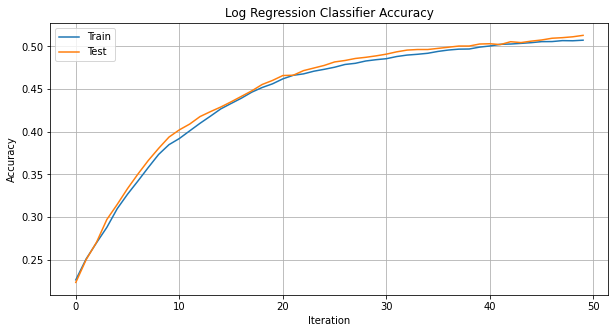

In [30]:
plt.rcParams['figure.figsize']=(10, 5)
plt.plot(training_accuracy_array)
plt.plot(test_accuracy_array)
plt.title('Log Regression Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

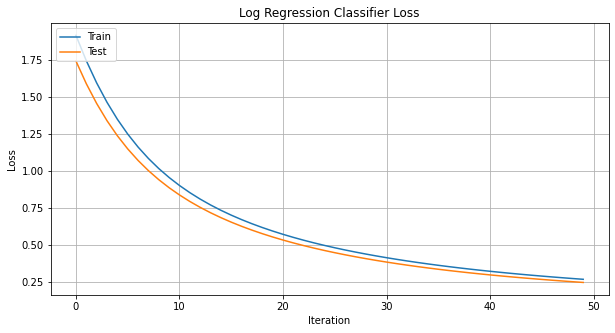

In [31]:
plt.plot(training_loss_array)
plt.plot(test_loss_array)
plt.title('Log Regression Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()